In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as xp

In [2]:
df=pd.read_csv('/content/HR_dashboard.csv')
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


# Data Preprocessing:

In [25]:
df.columns

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')

In [88]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

The given dataset does not contain any missing or empty values.






In [90]:
df.duplicated().sum()

0

No duplicate values have been identified within the dataset.

In [91]:
df.dtypes

Name                      object
Age                        int64
Gender                    object
Projects Completed         int64
Productivity (%)           int64
Satisfaction Rate (%)      int64
Feedback Score           float64
Department                object
Position                  object
Joining Date              object
Salary                     int64
dtype: object

# Data Visualization:

**1) What is the distribution of ages in the dataset? Are there any significant age groups that stand out?**

In [85]:
fig=xp.box(df,y=df['Age'],template='plotly_dark',title="Age Distribution")
fig.update_layout(title_x=0.5)

* The 50% of employees are aged between 26 and 42.

* The concentration of employees ages between the third quartile (Q3) and the second quartile (Q2) suggests a central tendency in the age distribution, indicating a stable and possibly experienced workforce within the organization.

**2) How does productivity vary among different genders? Are there any gender-specific patterns?**

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)',
       'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position',
       'Joining Date', 'Salary'],
      dtype='object')

In [5]:
gender_stats = df.groupby('Gender')['Productivity (%)'].describe()
gender_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,100.0,42.97,28.235466,0.0,17.5,41.0,61.75,96.0
Male,100.0,50.54,28.459938,0.0,27.5,47.0,75.50,98.0


In [87]:
fig=xp.box(df, x='Gender', y='Productivity (%)', title='Productivity by Gender',color=df['Gender'],template='plotly_dark')
fig.update_layout(title_x=0.5)

In [8]:
from scipy.stats import ttest_ind
male_productivity = df[df['Gender'] == 'Male']['Productivity (%)']
female_productivity = df[df['Gender'] == 'Female']['Productivity (%)']

t_stat, p_value = ttest_ind(male_productivity, female_productivity)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.8882505554987306
P-value: 0.06045462044141021


* Based on our analysis, we do not have enough evidence to suggest that the observed result is statistically significan.Therefor we fail to reject null hypothesis, which suggests that there is no significant diffrence between the productivity % among the Genders.

**3) What is the average satisfaction rate for each department? Are there any significant differences?**

In [9]:
satisfaction_mean_by_department=df.groupby('Department')['Satisfaction Rate (%)'].mean()
satisfaction_mean_by_department

Department
Finance      50.048780
HR           51.625000
IT           54.342105
Marketing    46.023810
Sales        48.617021
Name: Satisfaction Rate (%), dtype: float64

In [66]:
department_satisfaction_mean = df.groupby('Department')['Satisfaction Rate (%)'].mean().reset_index()
fig=xp.pie(
    department_satisfaction_mean,
    names='Department',

    values='Satisfaction Rate (%)',
    title='Average Satisfaction Rate by Department',
    labels={'Department': 'Department'},
    hole=0.4,  # To create a donut chart, you can adjust the hole size
    template='plotly_dark',  # Use a predefined Plotly template
    hover_name='Department',  # Show department names on hover
    hover_data={'Satisfaction Rate (%)': ':.1f%'},  # Format hover data
)
fig.update_traces(textinfo='percent+label')
fig.update_layout(legend_title_text='Department')
fig.update_layout(title_x=0.5)  # Center the title

# Show the plot
fig.show()

In [11]:
from scipy.stats import f_oneway
departments = df['Department'].unique()
department_satisfaction = [df[df['Department'] == dept]['Satisfaction Rate (%)'] for dept in departments]

f_statistic, p_value = f_oneway(*department_satisfaction)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.4590373941043202
P-value: 0.7657248819304454


* Based on our analysis, the p-value obtained from the ANOVA test is 0.76. Since this p-value is greater than the chosen significance level of 0.05, we do not have enough evidence to say that there is a significant difference in satisfaction rates between the departments. Therefore, we fail to reject the null hypothesis, which suggests that the average satisfaction rates among the departments are not significantly different.

**4) Is there any relationship between projects completed and salary? How does this vary based on position?**

In [80]:
fig=xp.scatter(df, x='Projects Completed', y='Salary', title='Relation between Salary and number of projects completed',color=df['Position'],template='plotly_dark')
fig.update_layout(title_x=0.5)

* There appears to be a positive linear relationship between salary and the number of projects completed. As the number of projects completed increases, salaries also tend to increase. Additionally, it can be observed that salaries tend to increase based on an individual's position within the organization

**5) What is the distribution of feedback scores? Are there any noticeable patterns based on gender?**

<Axes: xlabel='Feedback Score', ylabel='Density'>

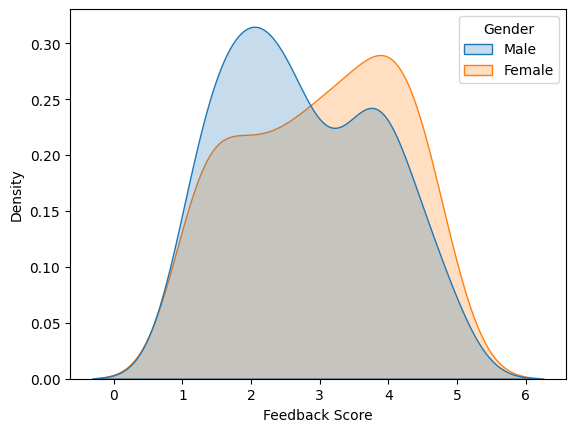

In [13]:
sns.kdeplot(data=df, x="Feedback Score", hue="Gender", fill=True, common_norm=False)

* Feedback score distributions reveal distinct gender-related patterns: males exhibit a complex bimodal distribution, indicating two prevalent segments, while females show a left-skewed pattern with lower scores.

**6) What is the average feedback score for each position? Are there any significant differences?**

In [14]:
pos_feed_score=df.groupby('Position')['Feedback Score'].mean().to_frame().reset_index()
pos_feed_score

,Position,Feedback Score
0,Analyst,2.766667
1,Intern,2.953333
2,Junior Developer,2.848571
3,Manager,3.022500
4,Senior Developer,2.633333
5,Team Lead,3.034375


In [79]:
fig=xp.bar(pos_feed_score,x='Position',y='Feedback Score',color='Position',template='plotly_dark',title="Average feedback_score by Position"  ,category_orders={"Position": pos_feed_score.sort_values('Feedback Score', ascending=False)['Position']})
fig.update_layout(title_x=0.5)


In [16]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Calculate average feedback score by position
average_feedback_by_position = df.groupby('Position')['Feedback Score'].mean()

# Perform ANOVA to check for significant differences
f_statistic, p_value = f_oneway(*[group['Feedback Score'] for name, group in df.groupby('Position')])

# Perform Tukey's HSD test for post-hoc analysis
tukey_result = pairwise_tukeyhsd(df['Feedback Score'], df['Position'])

print("Average Feedback Score by Position:")
print(average_feedback_by_position)
print("\nANOVA p-value:", p_value)
print("\nTukey's HSD:")
print(tukey_result)


Average Feedback Score by Position:
Position
Analyst             2.766667
Intern              2.953333
Junior Developer    2.848571
Manager             3.022500
Senior Developer    2.633333
Team Lead           3.034375
Name: Feedback Score, dtype: float64

ANOVA p-value: 0.6762782900787947

Tukey's HSD:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
         Analyst           Intern   0.1867 0.9864 -0.6328 1.0061  False
         Analyst Junior Developer   0.0819 0.9997 -0.7063 0.8701  False
         Analyst          Manager   0.2558 0.9287 -0.5081 1.0197  False
         Analyst Senior Developer  -0.1333 0.9972 -0.9528 0.6861  False
         Analyst        Team Lead   0.2677  0.931 -0.5382 1.0736  False
          Intern Junior Developer  -0.1048  0.999  -0.913 0.7034  False
          Intern          Manager   0.0692 0.99

 * Based on our analysis, the p-value obtained from the ANOVA test is 0.67. Since this p-value is greater than the chosen significance level of 0.05, we do not have enough evidence to say that there is a significant difference in satisfaction rates between the departments. Therefore, we fail to reject the null hypothesis, which suggests that the average feedback score among the Positions are not significantly different.

**7) Is there a relationship between age and satisfaction rate, considering the different genders?**

In [78]:
xp.scatter(df,x='Age',y='Satisfaction Rate (%)',color='Gender',template='plotly_dark',title='Relation between age and satisfaction_rate based on Genders ')
fig.update_layout(title_x=0.5)

* The scatterplot analysis suggests that there is no clear linear relationship between age and satisfaction rate when considering different genders. The data points are widely dispersed, indicating that age alone may not be a significant factor in predicting satisfaction rate for either gender. Other variables or factors not included in this analysis could potentially play a more influential role in determining satisfaction rates among individuals of different genders.

**8) Is there any correlation between feedback score and satisfaction rate?**

In [18]:
df['Feedback Score'].corr(df['Satisfaction Rate (%)'])

0.008067658039439082

In [77]:
fig=xp.scatter(df,x='Feedback Score',y='Satisfaction Rate (%)',template='plotly_dark',title='Relation between feedback_Score and Satisfaction_rate')
fig.update_layout(title_x=0.5)

* The scatterplot analysis reveals no apparent linear relationship between Feedback Score and Satisfaction Rate (%). The widely dispersed data points indicate that feedback scores do not consistently follow a specific trend based on satisfaction rates.

**9) Are there any specific age groups with higher feedback scores?**

In [20]:
age_group_avg_feedback = df.groupby('Age')['Feedback Score'].mean().sort_values(ascending=False).head(5)
age_group_avg_feedback=age_group_avg_feedback.to_frame().reset_index()

In [76]:
fig = xp.bar(
    age_group_avg_feedback,
    x='Age',
    y='Feedback Score',
    color='Age',
    title='Average Feedback Score by Age Group',
    labels={'Age': 'Age Group', 'Feedback Score': 'Average Feedback Score'},
    template='plotly_dark')


fig.update_layout(title_x=0.5)  # Center the title

# Show the plot
fig.show()

* The analysis of feedback scores indicates that, on average, individuals in the age group of 60 received the highest feedback scores, with an average score that surpassed all other age groups. Following closely behind were the age groups 41, 46, 47, and 32, which also exhibited notably high average feedback scores. These findings suggest that individuals in these specific age brackets tend to receive more favorable feedback in comparison to other age groups.

**10) How does the distribution of projects completed differ between departments?**

In [73]:
fig = xp.box(
    df,
    x='Department',
    y='Projects Completed',
      # Show individual data points
    title='Box Plot of Projects Completed by Department',
    labels={'Department': 'Department', 'Projects Completed': 'Projects Completed'},
    template='plotly_dark',  # Use a predefined Plotly template
    boxmode='group',  # Group box plots by 'Department'

)
fig.update_layout(title_x=0.5)  # Center the title

# Show the plot
fig.show()

* The boxplot analysis reveals notable differences in the distribution of projects completed across various departments

  **Median Less Than Center:**
* For departments with a median projects completed value below the center of the boxplot, there is a tendency towards fewer projects completed on average. This suggests varying workloads or project complexities that might impact project completion rates.

  **Median More Than Center:**
* Departments with a median projects completed value above the center of the boxplot tend to have a higher average number of projects completed. This indicates a potential emphasis on managing multiple projects or a higher level of project activity within these departments.

  **Median Exactly at Center:**
* Departments where the median projects completed value is approximately at the center of the boxplot exhibit a balanced distribution of project completion. This suggests a relatively consistent workload across these departments, with a similar number of projects being completed on average.

**11) What is the relationship between salary and satisfaction rate across different positions?**

In [84]:
fig=xp.scatter(df,x=df['Salary'],y=df['Satisfaction Rate (%)'],color='Position',template='plotly_dark',title="Relation between Salary and Satisfaction_rate")
fig.update_layout(title_x=0.5)

In [24]:
df['Salary'].corr(df['Satisfaction Rate (%)'])

-0.018302114116513966

* While our analysis did not reveal a significant linear relationship between salary and satisfaction rate, we did observe distinct variations in salary based on different positions. This suggests that satisfaction rate may be influenced by factors beyond salary alone, and the significant changes in salary by position highlight the role of job roles and responsibilities in determining compensation